<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
!pip install ydata_profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import ElasticNet
import warnings
import re
import phik

warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

display(df_train.head())

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

**Ваш ответ здесь.**

In [4]:
display(df_train.isnull().sum())
print(f"Колонки с пропущенными значениями в train: {list(df_train.columns[df_train.isnull().sum().values > 0])}")
print(f"Колонки с пропущенными значениями в test: {list(df_test.columns[df_test.isnull().sum().values > 0])}")

print(f"Кол-во дубликатов в train: {df_train.duplicated().sum()}")
print(f"Кол-во дубликатов в test: {df_test.duplicated().sum()}")

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


Колонки с пропущенными значениями в train: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Колонки с пропущенными значениями в test: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Кол-во дубликатов в train: 985
Кол-во дубликатов в test: 62


In [5]:
profile = ProfileReport(df_train, title="Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 27.09it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **Базовые выводы:**
1. В столбце **name** много уникальных значений. Можно попробовать вытащить только марку или марку и модель машины.
2. Кажется, что у **selling_price** есть сильные выбросы
3. **Transmission** и **year** сильно коррелирует с **selling_price**
4. **Мileage**, **max_power**, **torque** представлены в виде строки, хотя логичнее float


Достаточно много пропущенных, количество дубликатов не так критично.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [6]:
print("Основные статистики по числовым столбцам в train: ")
display(df_train.describe(include='number'))
print("Основные статистики по числовым столбцам в test: ")
display(df_test.describe(include='number'))

print("Основные статистики по категориальным столбцам в train: ")
display(df_train.describe(include='object'))
print("Основные статистики по категориальным столбцам в test: ")
display(df_test.describe(include='object'))


print(f'Абсолютная разница средних и медиан между train и test:')
display(df_train.describe(include='number').loc[['mean', '50%']] - df_test.describe(include='number').loc[['mean', '50%']])
print(f'Относительная разница средних и медиан между train и test в процентах:')
display(
    (df_train.describe(include='number').loc[['mean', '50%']] - df_test.describe(include='number').loc[['mean', '50%']])
    / df_train.describe(include='number').loc[['mean', '50%']] * 100
)

Основные статистики по числовым столбцам в train: 


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Основные статистики по числовым столбцам в test: 


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


Основные статистики по категориальным столбцам в train: 


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


Основные статистики по категориальным столбцам в test: 


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Абсолютная разница средних и медиан между train и test:


,year,selling_price,km_driven,seats
mean,0.137403,21614.155171,-1808.725483,0.008203
50%,1.000000,15001.000000,-1500.000000,0.000000


Относительная разница средних и медиан между train и test в процентах:


,year,selling_price,km_driven,seats
mean,0.006823,3.379772,-2.599318,0.151376
50%,0.049628,3.333556,-2.500000,0.000000


## **Выводы:**

1. Различия в средних и медианах числовых столбцов между train и test с учетом стандартного отклонения не кажутся существенными. Сплит на train и test сбалансированный.
2. **Мileage**, **max_power**, **torque** представлены в виде строки, хотя логичнее float
3. В столбцах **selling_price**,	**km_driven**,	**seats** могут быть выбросы
4. У большинства машин дизельные двигатели (**fuel**)
5. У большинства машин продавец физическое лицо (**sellet_type**)
6. У большинства машин ручная коробка передач (**transmission**)
7. У большинства машин был единственный владелец (**owner**)

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [7]:
X_train = df_train.drop('selling_price', axis=1)
print(f'Количество объектов с одинаковым признаковым описанием в train: {X_train.duplicated().sum()}')
display(X_train[X_train.duplicated()].head(10))

Количество объектов с одинаковым признаковым описанием в train: 1159


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
338,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
357,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
358,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
359,Jaguar XF 2.0 Diesel Portfolio,2017,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


In [8]:
df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first')
df_train.reset_index(inplace=True, drop=True)

In [9]:
assert df_train.shape == (5840, 13)

## **Могут ли быть скрытые дубли?**
Да. В данных много строковых столбцов, в них могут быть опечатки или строки с измененным порядком слов, но наполнение одинаковое. Можно поработать с форматами, привести что можно к float. Колонку name можно закинуть в LLM, попросить выделить марку, модель машины.
Еще 2 строки могут быть дублями, но в одной из них есть пропущенное значение. Такие строки за дубли считаться не будут.

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [10]:
delete_unit_of_measurement = lambda x: str(x).split()[0] if str(x).split()[0] != 'bhp' else None

df_train['mileage'] = df_train['mileage'].apply(delete_unit_of_measurement).astype(np.float32)
df_train['engine'] = df_train['engine'].apply(delete_unit_of_measurement).astype(np.float32)
df_train['max_power'] = df_train['max_power'].apply(delete_unit_of_measurement).astype(np.float32)

df_test['mileage'] = df_test['mileage'].apply(delete_unit_of_measurement).astype(np.float32)
df_test['engine'] = df_test['engine'].apply(delete_unit_of_measurement).astype(np.float32)
df_test['max_power'] = df_test['max_power'].apply(delete_unit_of_measurement).astype(np.float32)

In [11]:
# НАПИСАНО С ПОМОЩЬЮ DEEPSEEK
def parse_torque_value(torque_str):
    """
    Парсит строку с крутящим моментом и возвращает значение в Nm и максимальные обороты
    """
    if pd.isna(torque_str) or torque_str == '':
        return None, None

    torque_str = str(torque_str).strip()

    # Паттерны для различных форматов
    patterns = [
        # Формат: 190Nm@ 2000rpm
        r'(\d+\.?\d*)\s*Nm\s*@\s*(\d+[\d\-~]*)\s*rpm',
        # Формат: 22.4 kgm at 1750-2750rpm
        r'(\d+\.?\d*)\s*kgm\s*at\s*(\d+[\d\-~]*)\s*rpm',
        # Формат: "11.5@ 4,500(kgm@ rpm)"
        r'(\d+\.?\d*)\s*@\s*([\d,]+)\s*\(kgm@\s*rpm\)',
        # Формат: "24@ 1,900-2,750(kgm@ rpm)"
        r'(\d+\.?\d*)\s*@\s*([\d,\-]+)\s*\(kgm@\s*rpm\)',
        # Формат: 250@ 1250-5000rpm
        r'(\d+\.?\d*)\s*@\s*(\d+[\d\-]*)\s*rpm',
        # Формат: 250 Nm at 2750 rpm
        r'(\d+\.?\d*)\s*Nm\s*at\s*(\d+[\d\-]*)\s*rpm',
        # Формат: 180 Nm at 1440-1500rpm
        r'(\d+\.?\d*)\s*Nm\s*at\s*(\d+[\d\-]*)\s*rpm',
        # Формат: 20.4@ 1400-3400(kgm@ rpm)
        r'(\d+\.?\d*)\s*@\s*(\d+[\d\-]*)\s*\(kgm@\s*rpm\)',
        # Формат: 13.1kgm@ 4600rpm
        r'(\d+\.?\d*)\s*kgm\s*@\s*(\d+[\d\-]*)\s*rpm',
        # Формат: 6.1kgm@ 3000rpm
        r'(\d+\.?\d*)\s*kgm\s*@\s*(\d+[\d\-]*)\s*rpm',
        # Формат: 400Nm (только значение, без RPM)
        r'^(\d+\.?\d*)\s*Nm$',
        # Формат: 24 KGM at 1900-2750 RPM
        r'(\d+\.?\d*)\s*KGM\s*at\s*(\d+[\d\-]*)\s*RPM',
    ]

    for pattern in patterns:
        match = re.search(pattern, torque_str, re.IGNORECASE)
        if match:
            torque_val = match.group(1)

            # Преобразуем kgm в Nm (1 kgm = 9.80665 Nm)
            if 'kgm' in torque_str.lower() or 'kgm' in pattern.lower():
                torque_nm = float(torque_val) * 9.80665
            else:
                torque_nm = float(torque_val)

            # Обрабатываем RPM, если есть
            if len(match.groups()) > 1:
                rpm_str = match.group(2).replace(',', '')

                # Если диапазон RPM (например, 1500-2500), берем максимальное значение
                if '-' in rpm_str or '~' in rpm_str:
                    rpm_parts = re.split(r'[\-~]', rpm_str)
                    try:
                        max_rpm = max(float(rpm) for rpm in rpm_parts if rpm.strip())
                    except:
                        max_rpm = None
                else:
                    try:
                        max_rpm = float(rpm_str)
                    except:
                        max_rpm = None
            else:
                max_rpm = None

            return round(torque_nm, 2), max_rpm

    return None, None

def process_torque_data(df):
    """
    Обрабатывает DataFrame и создает новые колонки torque_nm и max_torque_rpm
    """
    # Применяем функцию парсинга к каждой строке
    results = df['torque'].apply(parse_torque_value)

    # Создаем новые колонки
    df['torque_nm'] = [result[0] for result in results]
    df['max_torque_rpm'] = [result[1] for result in results]

    return df

df_train = process_torque_data(df_train)
df_test = process_torque_data(df_test)
df_train[['torque', 'torque_nm', 'max_torque_rpm']].head(10)

,torque,torque_nm,max_torque_rpm
0,190Nm@ 2000rpm,190.00,2000.0
1,250Nm@ 1500-2500rpm,250.00,2500.0
2,22.4 kgm at 1750-2750rpm,219.67,2750.0
3,"11.5@ 4,500(kgm@ rpm)",112.78,4500.0
4,113.75nm@ 4000rpm,113.75,4000.0
5,"7.8@ 4,500(kgm@ rpm)",76.49,4500.0
6,59Nm@ 2500rpm,59.00,2500.0
7,170Nm@ 1800-2400rpm,170.00,2400.0
8,160Nm@ 2000rpm,160.00,2000.0
9,248Nm@ 2250rpm,248.00,2250.0


In [12]:
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [13]:
columns_to_fill = ['mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'max_torque_rpm']
df_train = df_train.fillna(df_train[columns_to_fill].median())
df_test = df_test.fillna(df_test[columns_to_fill].median())

## **Почему медиана?**
На этапе анализа выяснили что в числовых столбцах могут быть выбросы. Медиана менее восприимчива к выбросам чем среднее

## **Как правильно считать?**
По тренировочной выборке, потому что о тестовых данных мы "как бы" ничего не знаем. Если мы решим использовать модель в проде, нам нужно как-то заполнять пропуски во вновь пришедших данных. Делать это мы будем на основе данных их обучения.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [14]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## **Почему seats можно рассмотреть как категориальную?**
Столбец имеет мало уникальных значений.

С линейными моделями может возникать проблема, потому что они будут пытаться найти линейную зависимость с целевой переменной. С количеством мест, не факт что такая зависимость существует

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [15]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906364,5.426712,175.543853,3041.645205
std,4.095622,5.354320e+05,6.007114e+04,3.985954,485.662834,31.640430,0.982344,106.770607,906.661516
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,47.070000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950001,1197.000000,68.000000,5.000000,112.000000,2400.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.369999,1248.000000,81.860001,5.000000,160.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.299999,1498.000000,99.000000,5.000000,200.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1863.260000,21800.000000


В данном датасете доля пропусков была довольно маленькая ~3% и заполнение пропусков медианами не должно сильно повлиять на распределение столбцов. Однако, при большей доле пропущенных значений, распределение столбцов может существенно измениться

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

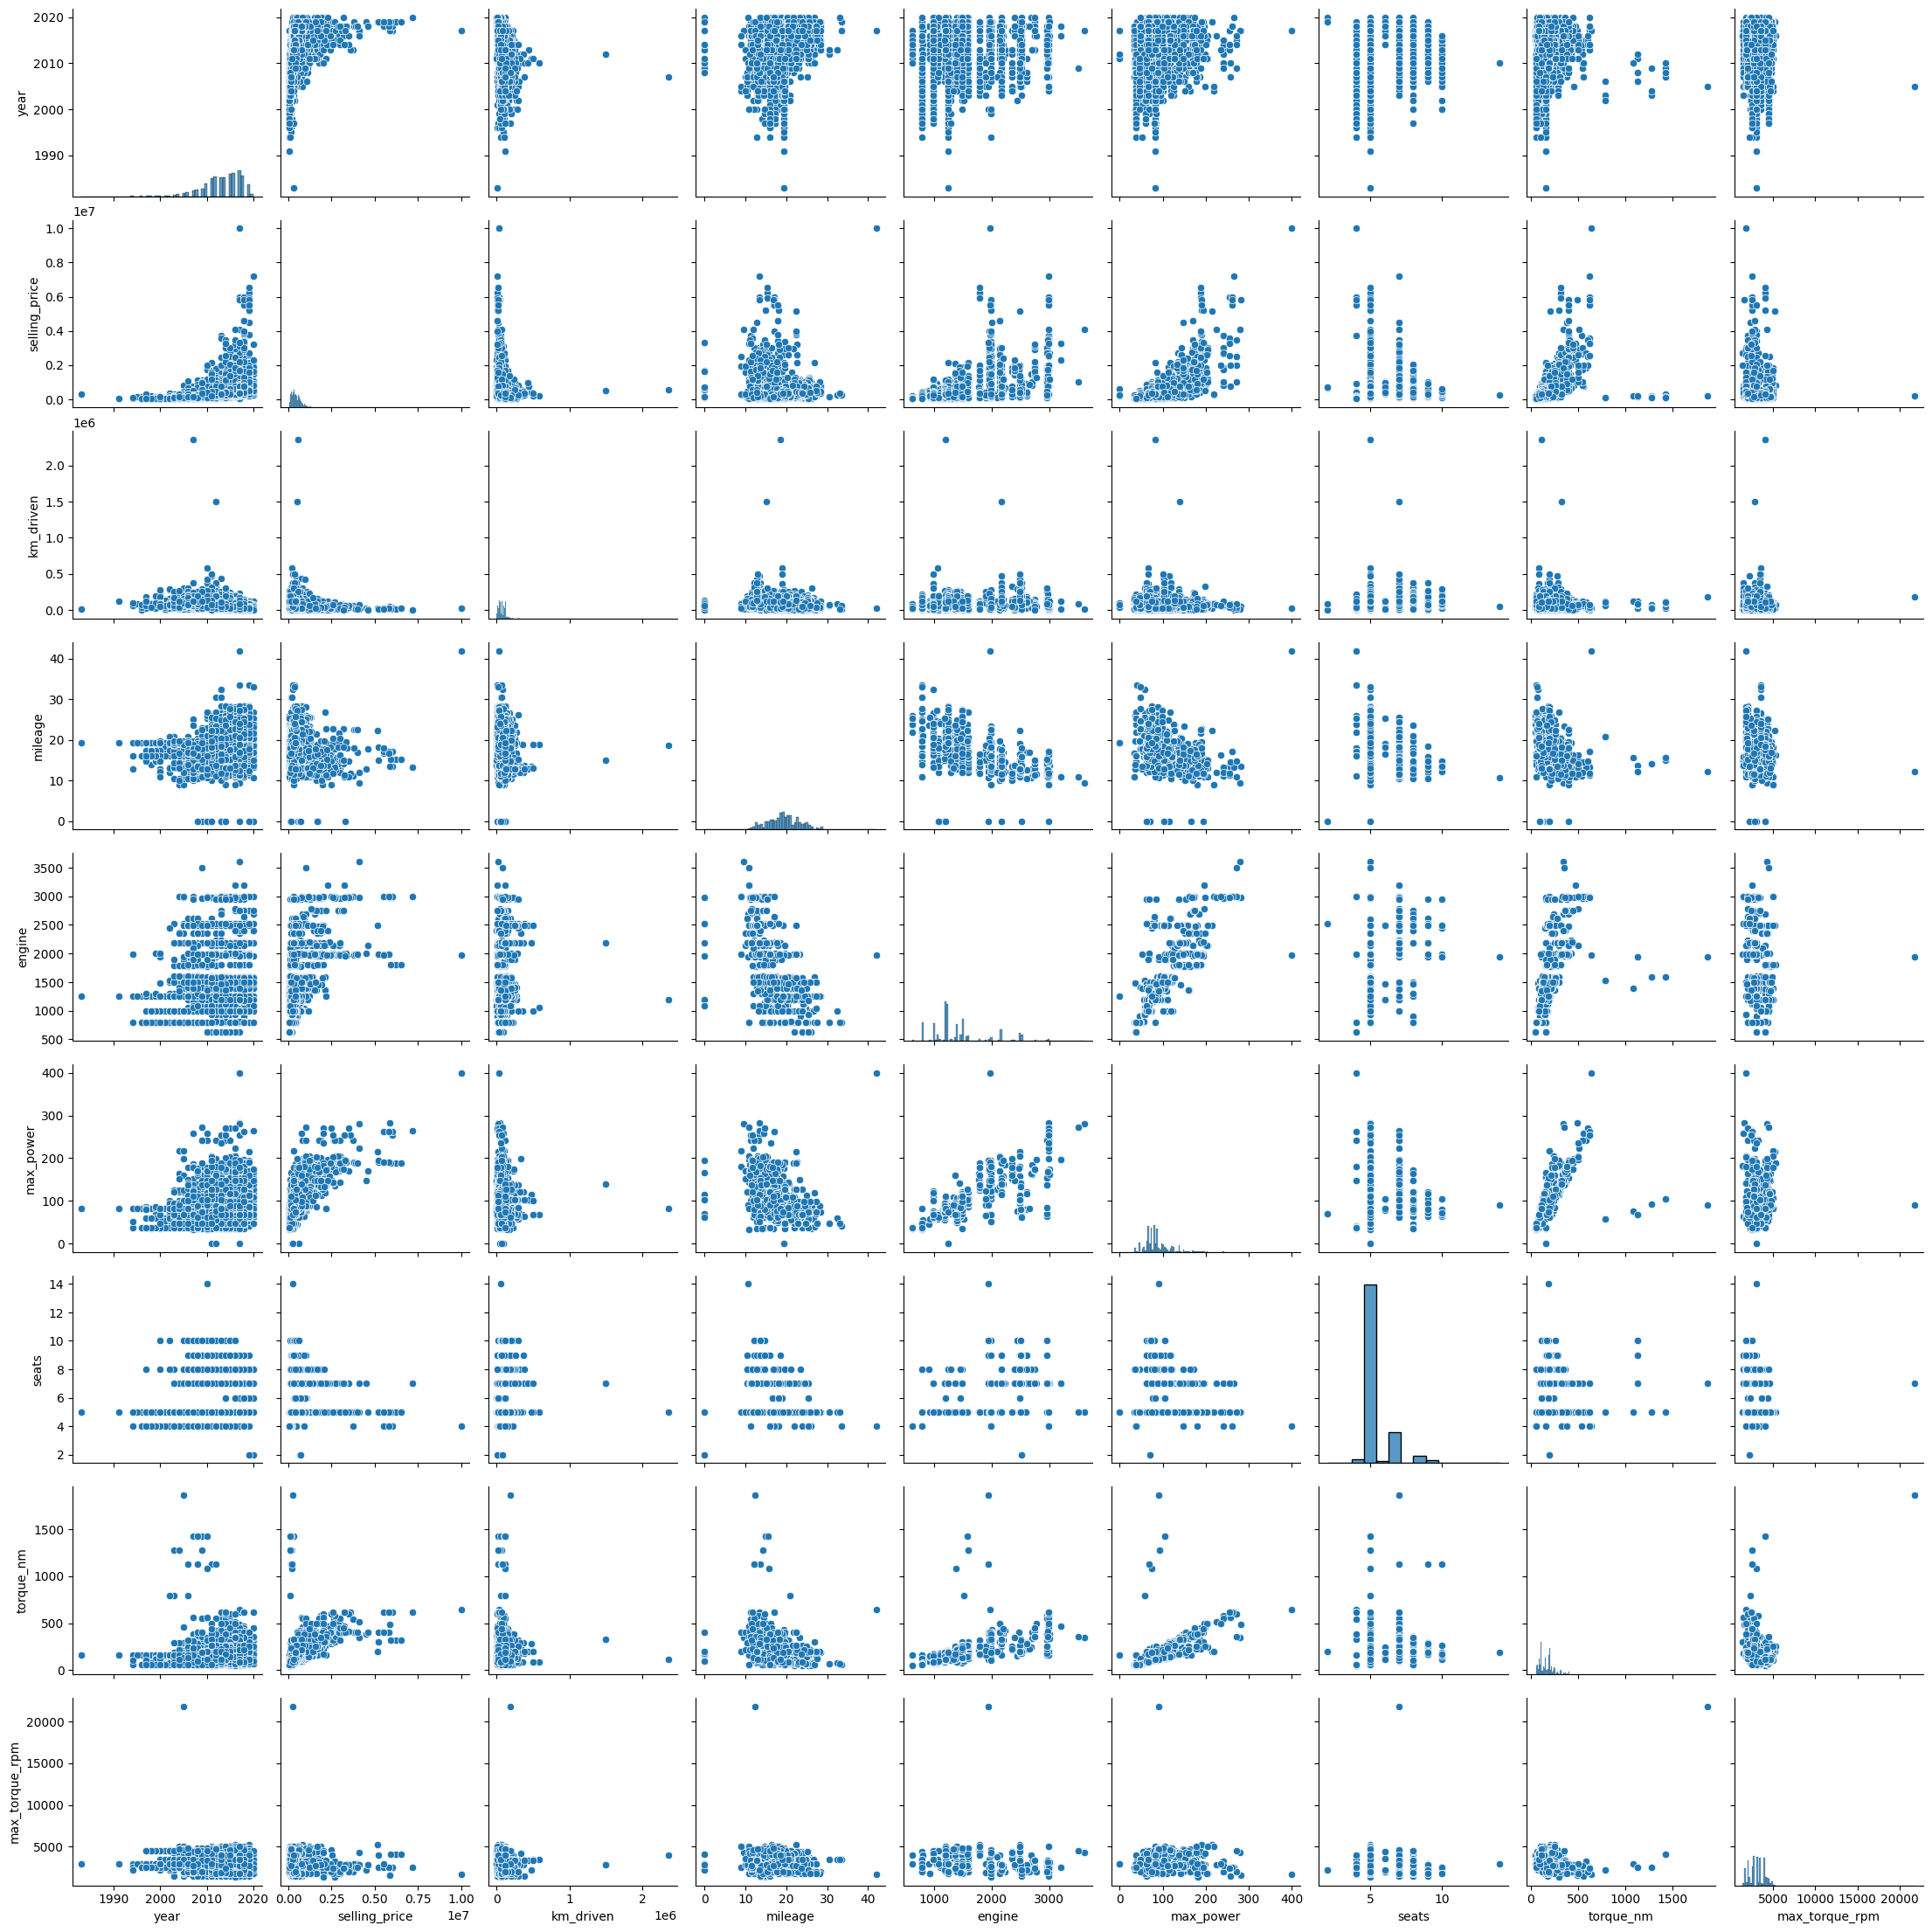

In [16]:
sns.pairplot(df_train)

## **Можно ли предположить на основе распределений связь признаков с целевой переменной?**
Да, можно. Но лучше проверить на цифрах. Выбросы на графиках мешают восприятию. По графикам кажется, что:

torque_nm, max_power, engine, year - положительная корреляция

km_driven - отрицательная корреляция

## **Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**
Сильно коррелируют(без учета целевой переменной):

engine/max_power

engine/torque_nm

max_power/torque_nm

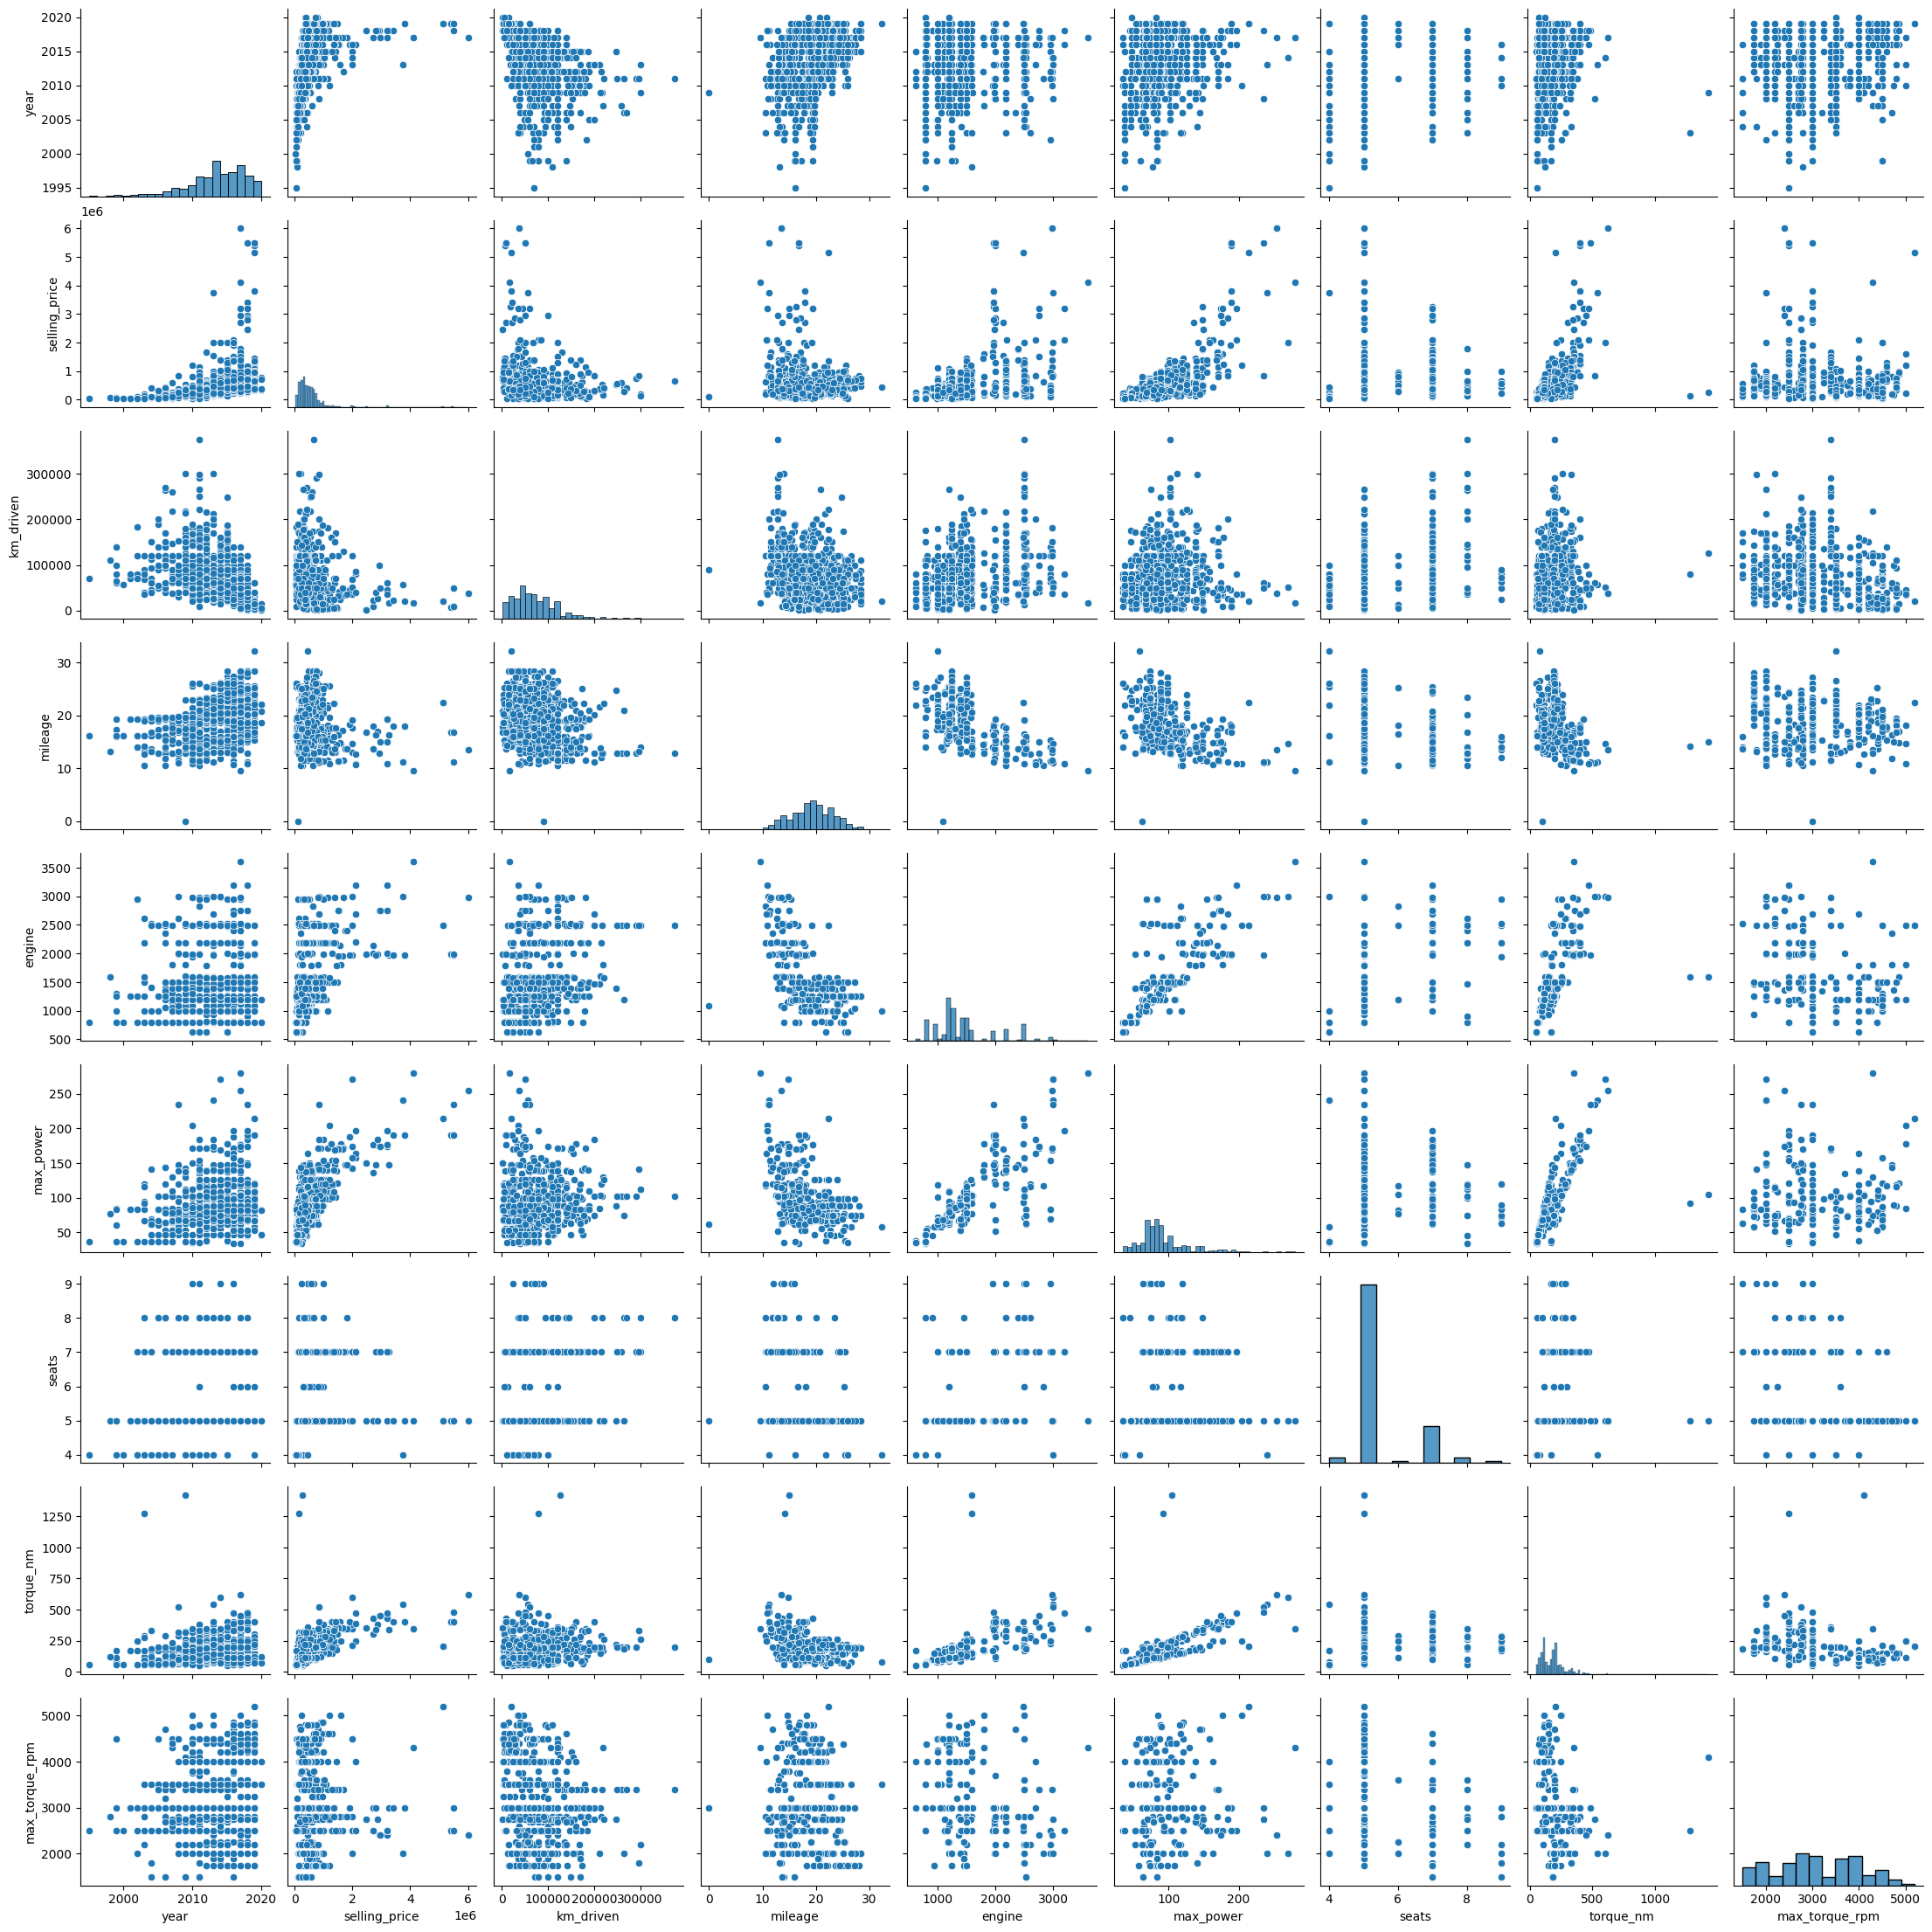

In [17]:
sns.pairplot(df_test)

## **Похожими ли оказались совокупности при разделении на трейн и тест?**
На первый взгляд да, но трудно сравнивать такое количество графиков

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

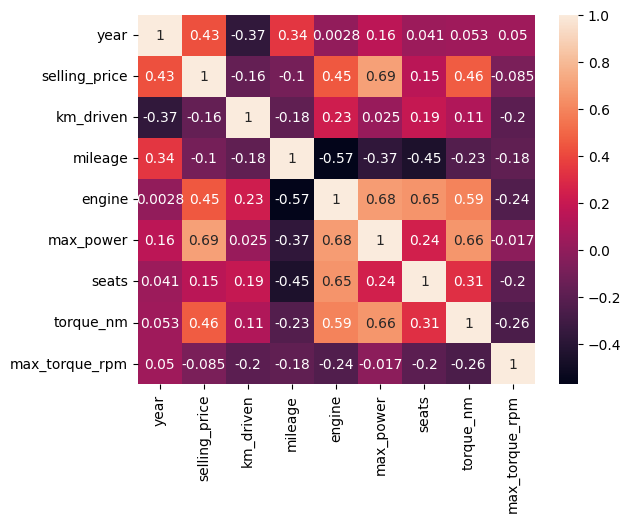

In [18]:
df_corr = df_train.select_dtypes('number').corr()
sns.heatmap(df_corr, annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

## **Какие 2 признака наименее скоррелированы между собой?**
engine и year

## **Между какими наблюдается довольно сильная положительная линейная зависимость?**
1. selling_price/max_power
2. engine/max_power
3. engine/seats
4. engine/torque_nm
5. max_power/torque_nm

## **Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**

Скорее нет, корреляция не такая высокая

## **Изучите типы корреляций в pd.corr(). Какую вы использовали по умолчанию?**

Корреляция Пирсона




### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [19]:
def calc_spearman_corr(x_1: np.array, x_2: np.array):
  x_1_ranks = x_1.argsort().argsort()
  x_2_ranks = x_2.argsort().argsort()

  d = x_1_ranks - x_2_ranks
  return 1 - 6 * np.sum(d**2) / (d.size * (d.size**2 - 1))

def spearman_corr_by_df(df: pd.DataFrame):
  number_cols = df.select_dtypes('number').columns
  corr_list = []

  for i, i_col in enumerate(number_cols):
    for j, j_col in enumerate(number_cols):
      if i >= j:
        corr = calc_spearman_corr(df[i_col], df[j_col])
        corr_list.append([i_col, j_col, corr])

  corr_list += list(
    map(
      lambda x: [x[1], x[0], x[2]],
      filter(lambda x: x[0] != x[1], corr_list)
    )
  )

  corr_df = pd.DataFrame(corr_list, columns=['col_1', 'col_2', 'corr'])
  return corr_df.pivot_table(index='col_1', columns='col_2', values='corr')[number_cols].loc[number_cols]

print('Корреляция Спирмена: ')
display(spearman_corr_by_df(df_train))
print('Библиотечная реализация: ')
display(df_train.select_dtypes('number').corr(method='spearman'))
print('phik: ')
display(df_train.phik_matrix())

Корреляция Спирмена: 


col_2,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,max_torque_rpm
year,1.000000,0.705083,-0.567031,0.344179,-0.038301,0.165631,0.045115,0.099857,0.077979
selling_price,0.705083,1.000000,-0.295273,0.026304,0.462233,0.611807,0.224200,0.577464,-0.125318
km_driven,-0.567031,-0.295273,1.000000,-0.198025,0.302698,0.039766,0.108045,0.239643,-0.317046
mileage,0.344179,0.026304,-0.198025,1.000000,-0.428647,-0.308642,-0.302795,-0.156671,-0.175947
engine,-0.038301,0.462233,0.302698,-0.428647,1.000000,0.711058,0.354557,0.831531,-0.365873
max_power,0.165631,0.611807,0.039766,-0.308642,0.711058,1.000000,0.198034,0.775001,-0.026124
seats,0.045115,0.224200,0.108045,-0.302795,0.354557,0.198034,1.000000,0.285732,-0.134167
torque_nm,0.099857,0.577464,0.239643,-0.156671,0.831531,0.775001,0.285732,1.000000,-0.526142
max_torque_rpm,0.077979,-0.125318,-0.317046,-0.175947,-0.365873,-0.026124,-0.134167,-0.526142,1.000000


Библиотечная реализация: 


,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,max_torque_rpm
year,1.000000,0.707123,-0.569659,0.346132,-0.038056,0.165798,0.048291,0.100770,0.077914
selling_price,0.707123,1.000000,-0.295665,0.026186,0.463577,0.612258,0.317605,0.578277,-0.124854
km_driven,-0.569659,-0.295665,1.000000,-0.198466,0.304504,0.040919,0.195317,0.240808,-0.318948
mileage,0.346132,0.026186,-0.198466,1.000000,-0.429871,-0.308824,-0.435458,-0.157136,-0.177330
engine,-0.038056,0.463577,0.304504,-0.429871,1.000000,0.713113,0.527716,0.835192,-0.367701
max_power,0.165798,0.612258,0.040919,-0.308824,0.713113,1.000000,0.304857,0.775638,-0.025733
seats,0.048291,0.317605,0.195317,-0.435458,0.527716,0.304857,1.000000,0.432337,-0.198562
torque_nm,0.100770,0.578277,0.240808,-0.157136,0.835192,0.775638,0.432337,1.000000,-0.528002
max_torque_rpm,0.077914,-0.124854,-0.318948,-0.177330,-0.367701,-0.025733,-0.198562,-0.528002,1.000000


phik: 
interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'max_torque_rpm']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,max_torque_rpm
name,1.000000,0.948995,0.994871,0.000000,1.000000,0.799127,1.000000,0.830098,0.999661,1.000000,0.997906,0.999985,0.999978,0.999916
year,0.948995,1.000000,0.219841,0.081574,0.205834,0.232412,0.153714,0.418636,0.278368,0.213156,0.381639,0.288178,0.184985,0.280345
selling_price,0.994871,0.219841,1.000000,0.000000,0.157885,0.334505,0.463058,0.557641,0.649913,0.503682,0.872166,0.196447,0.686889,0.199490
km_driven,0.000000,0.081574,0.000000,1.000000,0.046285,0.000000,0.012824,0.087887,0.081466,0.210747,0.000000,0.096223,0.000000,0.048817
fuel,1.000000,0.205834,0.157885,0.046285,1.000000,0.050771,0.053721,0.030943,0.584819,0.644421,0.236006,0.450714,0.348480,0.557734
seller_type,0.799127,0.232412,0.334505,0.000000,0.050771,1.000000,0.127968,0.176612,0.062971,0.160346,0.331904,0.032173,0.147490,0.151584
transmission,1.000000,0.153714,0.463058,0.012824,0.053721,0.127968,1.000000,0.096990,0.325261,0.520161,0.511877,0.045734,0.358101,0.033275
owner,0.830098,0.418636,0.557641,0.087887,0.030943,0.176612,0.096990,1.000000,0.152834,0.186011,0.121438,0.046741,0.061041,0.114083
mileage,0.999661,0.278368,0.649913,0.081466,0.584819,0.062971,0.325261,0.152834,1.000000,0.591328,0.687961,0.679653,0.378746,0.321103
engine,1.000000,0.213156,0.503682,0.210747,0.644421,0.160346,0.520161,0.186011,0.591328,1.000000,0.720780,0.603400,0.609425,0.633526


## **Выводы:**
Немного отличаются корреляции в библиотечной и самописной реализации. Скорее всего из-за того что в библиотечной реализации учитываются одинаковые ранги

## **Интерпретация:**
Корреляция Спирмена и phik довольно сильно отличается, так как phik смотрит, есть ли какая-либо взаимосвязь в распределении, даже если она не монотонная

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [20]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [21]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes('number').drop('selling_price', axis=1)

In [22]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats,torque_nm,max_torque_rpm
0,2014,145500,23.400000,1248,74.000000,5,190.00,2000.0
1,2014,120000,21.139999,1498,103.519997,5,250.00,2500.0
2,2010,127000,23.000000,1396,90.000000,5,219.67,2750.0
3,2007,120000,16.100000,1298,88.199997,5,112.78,4500.0
4,2017,45000,20.139999,1197,81.860001,5,113.75,4000.0


In [23]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes('number').drop('selling_price', axis=1)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def fit_predict_lr(model, X_train, y_train, X_test, y_test):
  lr = model()

  lr.fit(X_train, y_train)

  preds = lr.predict(X_test)

  print(f'MSE: {MSE(y_test, preds)}')
  print(f'RMSE: {MSE(y_test, preds)**0.5}')
  print(f'R2: {r2_score(y_test, preds)}')
  return lr, preds

model_lr, preds_lr = fit_predict_lr(LinearRegression, X_train, y_train, X_test, y_test)

MSE: 229678873035.15268
RMSE: 479248.2373834594
R2: 0.6004393470326896


## **Выводы:**
R2 0.6 кажется неплохой отправной точкой.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [25]:
def calc_r2_score(y_true: np.array, y_pred: np.array):
  squared_error_sum = np.sum((y_true - y_pred)**2)
  sum_of_squares = np.sum((y_true - np.mean(y_true))**2)

  return 1 - squared_error_sum / sum_of_squares

calc_r2_score(y_test, preds_lr)

np.float64(0.6004393470326896)

## **Объяснение:**
По сути что мы сделали

взяли MSE: $ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

взяли MSE модели, которая всегда предсказывает среднее значение целевой переменной: $ \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2 $

и вычли полученное значение из единицы

Таким образом получили что-то вроде "насколько наша модель лучше базовой модели, которая всегда предсказывает среднее значение"



### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [26]:
def calc_adjusted_r2(
    y_true: np.array,
    y_pred: np.array,
    n_features: int,
    n_rows: int
  ):
    r2 = calc_r2_score(y_true, y_pred)

    return 1 - (1 - r2)*(n_rows - 1)/(n_rows - n_features - 1)

calc_adjusted_r2(y_test, preds_lr, X_test.shape[1], X_test.shape[0])

np.float64(0.597213832175234)

## **Когда применяется:**
1. При сравнении моделей с разным числом признаков

2. При отборе признаков

3. Когда мало данных относительно числа признаков

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_scaled = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

model_lr_scaled, preds_lr_scaled = fit_predict_lr(LinearRegression, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 229678873035.15237
RMSE: 479248.2373834591
R2: 0.6004393470326903


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [28]:
pd.DataFrame(
    {'features': X_train.columns, 'coefs': model_lr_scaled.coef_}
).sort_values(by='coefs', key=lambda x: abs(x), ascending=False)

,features,coefs
4,max_power,328747.698389
0,year,165631.810956
7,max_torque_rpm,-58342.144022
1,km_driven,-48835.715675
5,seats,-30553.490117
3,engine,23506.804186
2,mileage,-8099.474332
6,torque_nm,7367.812304


Наиболее информативным оказался признак **max_power**

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [29]:
from sklearn.linear_model import Lasso

model_lasso, preds_lasso = fit_predict_lr(Lasso, X_train_scaled, y_train, X_test_scaled, y_test)

pd.DataFrame(
    {'features': X_train.columns, 'coefs': model_lasso.coef_}
).sort_values(by='coefs', key=lambda x: abs(x), ascending=False)

MSE: 229679587830.57312
RMSE: 479248.9831294096
R2: 0.6004381035394544


,features,coefs
4,max_power,328748.898872
0,year,165629.771480
7,max_torque_rpm,-58340.067496
1,km_driven,-48834.798089
5,seats,-30549.774729
3,engine,23505.237864
2,mileage,-8096.284811
6,torque_nm,7367.061846


## **Предположите почему регуляризация не занулила веса**
1. Низкий коэффициент регуляризации
2. Все фичи важные

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [30]:
lasso_grid = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
}
cv = KFold(n_splits=10)
gs = GridSearchCV(
    estimator=lasso_grid,
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

gs.fit(X_train_scaled, y_train)

best_model = gs.best_estimator_

preds_lasso_grid = best_model.predict(X_test_scaled)

print(f'MSE: {MSE(y_test, preds_lasso_grid)}')
print(f'RMSE: {MSE(y_test, preds_lasso_grid)**0.5}')
print(f'R2: {r2_score(y_test, preds_lasso_grid)}')

print(f'Лучший коэффициент регуляризации: {best_model.alpha}')
pd.DataFrame(
    {'features': X_train.columns, 'coefs': best_model.coef_}
).sort_values(by='coefs', key=lambda x: abs(x), ascending=False)

MSE: 237536461804.8137
RMSE: 487377.12482718524
R2: 0.5867698995207549
Лучший коэффициент регуляризации: 10000


,features,coefs
4,max_power,335556.230244
0,year,153840.603887
7,max_torque_rpm,-44963.506202
1,km_driven,-39026.277296
6,torque_nm,2328.501946
5,seats,-328.174940
3,engine,0.000000
2,mileage,0.000000


### **Сколько грид-сёрчу пришлось обучать моделей?**
90 раз. По 10 раз для каждого alpha
### **Что значит каждый параметр param_grid, который вы заполняли для GridSearch? Опишите каждый**
1. alpha - коэффициент регуляризации
### **Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?**
Лучшим оказался: alpha = 10000

Занулились веса признаков: engine, mileage

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [31]:
en = ElasticNet()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'l1_ratio': np.arange(0, 1.1, 0.1)
}
cv = KFold(n_splits=10)
gs = GridSearchCV(
    estimator=en,
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

gs.fit(X_train_scaled, y_train)

best_model = gs.best_estimator_

preds_en = best_model.predict(X_test_scaled)

print(f'MSE: {MSE(y_test, preds_en)}')
print(f'RMSE: {MSE(y_test, preds_en)**0.5}')
print(f'R2: {r2_score(y_test, preds_en)}')

print(f'Лучший коэффициент регуляризации: {best_model.alpha}')
print(f'Лучший l1_ratio: {best_model.l1_ratio}')
pd.DataFrame(
    {'features': X_train.columns, 'coefs': best_model.coef_}
).sort_values(by='coefs', key=lambda x: abs(x), ascending=False)

MSE: 242849246650.34592
RMSE: 492797.36875347246
R2: 0.5775275179559918
Лучший коэффициент регуляризации: 1
Лучший l1_ratio: 0.9


,features,coefs
4,max_power,270136.892613
0,year,154016.697529
3,engine,53136.251875
1,km_driven,-50925.961196
7,max_torque_rpm,-40460.771831
6,torque_nm,32815.109799
5,seats,-32599.349848
2,mileage,-1071.268839


### **Сколько грид-сёрчу пришлось обучать моделей?**
11 * 9 * 10 = 990 моделей
### **Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?**
Лучший коэффициент регуляризации: 1

Лучший l1_ratio: 0.9

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [32]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [33]:
df_train['brand'] = df_train['name'].apply(lambda x: str(x).split()[0])
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
X_train_cat['seats'] = X_train_cat['seats'].astype(str)

df_test['brand'] = df_test['name'].apply(lambda x: str(x).split()[0])
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)
X_test_cat['seats'] = X_test_cat['seats'].astype(str)

In [34]:
X_train_cat.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,max_torque_rpm,brand
0,2014,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5,190.00,2000.0,Maruti
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5,250.00,2500.0,Skoda
2,2010,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5,219.67,2750.0,Hyundai
3,2007,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5,112.78,4500.0,Maruti
4,2017,45000,Petrol,Individual,Manual,First Owner,20.139999,1197,81.860001,5,113.75,4000.0,Hyundai


In [35]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats,brand
count,5840,5840,5840,5840,5840,5840
unique,4,3,2,5,9,30
top,Diesel,Individual,Manual,First Owner,5,Maruti
freq,3177,5223,5336,3603,4618,1804


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [36]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import ColumnTransformer

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']
numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque_nm', 'max_torque_rpm']

preprocessor = ColumnTransformer(
  transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
  ]
)

preprocessor.fit(X_train_cat)
cat_encoder = preprocessor.named_transformers_['cat']
feature_names = (numerical_features +
                 list(cat_encoder.get_feature_names_out(categorical_features)))

X_train = pd.DataFrame(preprocessor.transform(X_train_cat), columns=feature_names)
X_test = pd.DataFrame(preprocessor.transform(X_test_cat), columns=feature_names)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

### **Как корректно работать с OHE преобразованием?**
1. Делать fit только на трейне
2. Удалять один столбец
### **Почему мы удаляем один столбец?**
Чтобы не возникало мультиколлинеарности столбцов
### **Корректно ли их удалить?**
Нет. В таком случае модель не сможет отличить k столбцов от столбца, который был удален

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
}
cv = KFold(n_splits=10)
gs = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

gs.fit(X_train, y_train)

best_model = gs.best_estimator_

preds_ridge = best_model.predict(X_test)

print(f'MSE: {MSE(y_test, preds_ridge)}')
print(f'RMSE: {MSE(y_test, preds_ridge)**0.5}')
print(f'R2: {r2_score(y_test, preds_ridge)}')

print(f'Лучший коэффициент регуляризации: {best_model.alpha}')
pd.DataFrame(
    {'features': X_train.columns, 'coefs': best_model.coef_}
).sort_values(by='coefs', key=lambda x: abs(x), ascending=False).head(10)

MSE: 124759697231.746
RMSE: 353213.3876734374
R2: 0.7829619005388846
Лучший коэффициент регуляризации: 1


,features,coefs
15,owner_Test Drive Car,2.512625e+06
53,brand_Volvo,1.614320e+06
40,brand_Lexus,1.517501e+06
26,brand_BMW,9.570175e+05
39,brand_Land,8.629225e+05
36,brand_Jaguar,5.941332e+05
44,brand_Mercedes-Benz,5.695107e+05
50,brand_Tata,-5.388157e+05
29,brand_Datsun,-5.329544e+05
27,brand_Chevrolet,-5.175615e+05


## **Удалось ли улучшить качество прогнозов?**
Да, качество стало заметно лучше

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [38]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [39]:
def business_metrics(y_true, y_pred):
  y_true_array = np.array(y_true)
  y_pred_array = np.array(y_pred)

  diff = abs(y_true_array - y_pred_array)
  return np.mean((diff / y_true_array) <= 0.1) * 100

print(f'Линейная регрессия: {business_metrics(y_test, preds_lr)}')
print(f'Линейная регрессия(X нормализован): {business_metrics(y_test, preds_lr_scaled)}')
print(f'Lasso регрессия: {business_metrics(y_test, preds_lasso)}')
print(f'ElasticNet регрессия: {business_metrics(y_test, preds_en)}')
print(f'Ridge регрессия(с обработкой категориальных фичей): {business_metrics(y_test, preds_ridge)}')

Линейная регрессия: 23.9
Линейная регрессия(X нормализован): 23.9
Lasso регрессия: 23.9
ElasticNet регрессия: 25.2
Ridge регрессия(с обработкой категориальных фичей): 30.2


## **Какая модель лучше всего решает задачу:**
Ridge регрессия(с обработкой категориальных фичей)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [40]:
def your_business_metrics(y_true, y_pred):
  y_true_array = np.array(y_true)
  y_pred_array = np.array(y_pred)

  diff = y_true_array - y_pred_array
  return np.mean(np.where(diff < 0, 2*abs(diff), 0.5*np.abs(diff)))

print(f'Линейная регрессия: {your_business_metrics(y_test, preds_lr)}')
print(f'Линейная регрессия(X нормализован): {your_business_metrics(y_test, preds_lr_scaled)}')
print(f'Lasso регрессия: {your_business_metrics(y_test, preds_lasso)}')
print(f'ElasticNet регрессия: {your_business_metrics(y_test, preds_en)}')
print(f'Ridge регрессия(с обработкой категориальных фичей): {your_business_metrics(y_test, preds_ridge)}')

Линейная регрессия: 237036.84080161422
Линейная регрессия(X нормализован): 237036.84080161285
Lasso регрессия: 237036.36691925026
ElasticNet регрессия: 229823.14100980907
Ridge регрессия(с обработкой категориальных фичей): 189473.30852164817


## **Метрика:**
Добавляем веса к ошибкам. Если недопрогноз, умножаем на 2, если перепрогноз, умножаем на 0.5
## **Какая модель лучше всего решает задачу:**
Ridge регрессия(с обработкой категориальных фичей)

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
